In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
revenue_df = pd.read_csv("Resources/Companies_ranked_by_Revenue.csv")
earnings_df = pd.read_csv("Resources/Companies_ranked_by_Earnings.csv")
marketcap_df = pd.read_csv("Resources/Companies_ranked_by_Market_Cap.csv")

In [3]:
revenue_df.head()

,Rank,Name,Symbol,revenue_ttm,price (GBP),country
0,1,Walmart,WMT,665035000000,61.029186,United States
1,2,Amazon,AMZN,604334000000,143.454209,United States
2,3,Saudi Aramco,2222.SR,495354806850,5.505405,Saudi Arabia
3,4,Sinopec,600028.SS,435696880608,0.748295,China
4,5,PetroChina,601857.SS,429671599508,0.969769,China


In [4]:
earnings_df.head()

,Rank,Name,Symbol,earnings_ttm,price (GBP),country
0,1,Saudi Aramco,2222.SR,2.283780e+11,5.505405,Saudi Arabia
1,2,Apple,AAPL,1.216250e+11,176.734336,United States
2,3,Microsoft,MSFT,1.077870e+11,326.461762,United States
3,4,Alphabet (Google),GOOG,1.018210e+11,126.279631,United States
4,5,Berkshire Hathaway,BRK-B,8.890400e+10,347.625201,United States


In [5]:
marketcap_df.head()

,Rank,Name,Symbol,marketcap,price (GBP),country
0,1,Apple,AAPL,2.689903e+12,176.919492,United States
1,2,Microsoft,MSFT,2.427170e+12,326.537958,United States
2,3,NVIDIA,NVDA,2.259353e+12,92.105725,United States
3,4,Alphabet (Google),GOOG,1.549815e+12,126.458691,United States
4,5,Amazon,AMZN,1.506038e+12,143.492307,United States


In [6]:
revenue_df = revenue_df.rename(columns={
    "revenue_ttm": "Revenue",
    "price (GBP)": "Price_GBP"
})

In [7]:
earnings_df = earnings_df.rename(columns={
    "earnings_ttm": "Earnings",
    "price (GBP)": "Price_GBP"
})

In [8]:
marketcap_df = marketcap_df.rename(columns={
    "marketcap": "Market_Cap",
    "price (GBP)": "Price_GBP"
})

In [9]:
merged_df = earnings_df.merge(marketcap_df, on='Name', suffixes=('_earnings', '_marketcap'))
merged_df = merged_df.merge(revenue_df, on='Name')

In [10]:
merged_df.head()

,Rank_earnings,Name,Symbol_earnings,Earnings,Price_GBP_earnings,country_earnings,Rank_marketcap,Symbol_marketcap,Market_Cap,Price_GBP_marketcap,country_marketcap,Rank,Symbol,Revenue,Price_GBP,country
0,1,Saudi Aramco,2222.SR,2.283780e+11,5.505405,Saudi Arabia,6,2222.SR,1.348543e+12,5.505405,Saudi Arabia,3,2222.SR,495354806850,5.505405,Saudi Arabia
1,2,Apple,AAPL,1.216250e+11,176.734336,United States,1,AAPL,2.689903e+12,176.919492,United States,7,AAPL,385603000000,176.706906,United States
2,3,Microsoft,MSFT,1.077870e+11,326.461762,United States,2,MSFT,2.427170e+12,326.537958,United States,21,MSFT,245122000000,326.316990,United States
3,4,Alphabet (Google),GOOG,1.018210e+11,126.279631,United States,4,GOOG,1.549815e+12,126.458691,United States,12,GOOG,328284000000,126.252962,United States
4,5,Berkshire Hathaway,BRK-B,8.890400e+10,347.625201,United States,8,BRK-B,7.492296e+11,347.667109,United States,6,BRK-B,402877000000,347.537576,United States


In [11]:
merged_df = merged_df.rename(columns={
    "Symbol_earnings": "Symbol",
    "country_earnings": "Country"
})

merged_df = merged_df[['Name', 'Symbol', 'Country','Earnings', 'Market_Cap', 'Revenue']]
merged_df.head()

,Name,Symbol,Symbol,Country,Earnings,Market_Cap,Revenue
0,Saudi Aramco,2222.SR,2222.SR,Saudi Arabia,2.283780e+11,1.348543e+12,495354806850
1,Apple,AAPL,AAPL,United States,1.216250e+11,2.689903e+12,385603000000
2,Microsoft,MSFT,MSFT,United States,1.077870e+11,2.427170e+12,245122000000
3,Alphabet (Google),GOOG,GOOG,United States,1.018210e+11,1.549815e+12,328284000000
4,Berkshire Hathaway,BRK-B,BRK-B,United States,8.890400e+10,7.492296e+11,402877000000


In [12]:
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
merged_df.head()

,Name,Symbol,Country,Earnings,Market_Cap,Revenue
0,Saudi Aramco,2222.SR,Saudi Arabia,2.283780e+11,1.348543e+12,495354806850
1,Apple,AAPL,United States,1.216250e+11,2.689903e+12,385603000000
2,Microsoft,MSFT,United States,1.077870e+11,2.427170e+12,245122000000
3,Alphabet (Google),GOOG,United States,1.018210e+11,1.549815e+12,328284000000
4,Berkshire Hathaway,BRK-B,United States,8.890400e+10,7.492296e+11,402877000000


In [13]:
merged_df['Earnings_Rank'] = merged_df['Earnings'].rank(ascending=False).astype(int)
merged_df['MarketCap_Rank'] = merged_df['Market_Cap'].rank(ascending=False).astype(int)
merged_df['Revenue_Rank'] = merged_df['Revenue'].rank(ascending=False).astype(int)
merged_df.head()

,Name,Symbol,Country,Earnings,Market_Cap,Revenue,Earnings_Rank,MarketCap_Rank,Revenue_Rank
0,Saudi Aramco,2222.SR,Saudi Arabia,2.283780e+11,1.348543e+12,495354806850,1,6,3
1,Apple,AAPL,United States,1.216250e+11,2.689903e+12,385603000000,2,1,7
2,Microsoft,MSFT,United States,1.077870e+11,2.427170e+12,245122000000,3,2,21
3,Alphabet (Google),GOOG,United States,1.018210e+11,1.549815e+12,328284000000,4,4,12
4,Berkshire Hathaway,BRK-B,United States,8.890400e+10,7.492296e+11,402877000000,5,8,6


In [14]:
merged_df.to_csv("Merged_Company_Financial.csv", index=False)

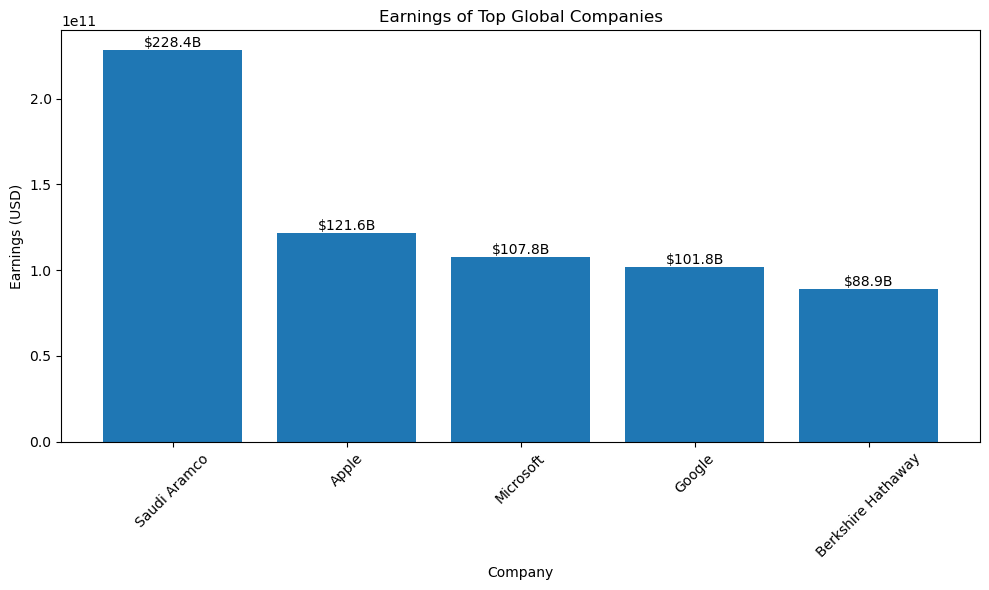

In [15]:
# Company names and earnings in USD
companies = ['Saudi Aramco', 'Apple', 'Microsoft', 'Google', 'Berkshire Hathaway']
earnings = [2.283780e+11, 1.216250e+11, 1.077870e+11, 1.018210e+11, 8.890400e+10]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(companies, earnings)

# Add titles and labels
plt.title('Earnings of Top Global Companies')
plt.xlabel('Company')
plt.ylabel('Earnings (USD)')

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${yval/1e9:.1f}B", ha='center', va='bottom')

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Load the medal tally data
medal_df = pd.read_csv("country_metrics_medals.csv")

# Bar chart sorted by total medals
fig = px.bar(
    medal_df.sort_values("Total", ascending=False),
    x="Country",
    y="Total",
    color="Total",
    title="🏆 Total Medals by Country (Financial Olympics)",
    labels={"Total": "Total Medals"},
    text="Total"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [17]:
fig = go.Figure(data=[
    go.Bar(name='Gold', x=medal_df['Country'], y=medal_df['Gold']),
    go.Bar(name='Silver', x=medal_df['Country'], y=medal_df['Silver']),
    go.Bar(name='Bronze', x=medal_df['Country'], y=medal_df['Bronze'])
])

fig.update_layout(
    barmode='stack',
    title="🎖️ Gold, Silver, Bronze Breakdown by Country",
    xaxis_title="Country",
    yaxis_title="Medal Count",
    xaxis_tickangle=-45
)

fig.show()


In [ ]:
# Load medal data
medal_df = pd.read_csv("country_metrics_medals.csv")

# Basic choropleth map by country
fig = px.choropleth(
    medal_df,
    locations="Country",
    locationmode="country names",  # Match full country names
    color="Total",
    hover_name="Country",
    color_continuous_scale="YlOrRd",
    title="🌍 Global Financial Olympics: Total Medals by Country"
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()